# Lecture 8: Convolutional Neural Networks

Layer:

$$
F_\sigma(x; w) := \sigma \left( w_0 + \sum_{j=1}^M x_j w_j \right)
\overset{\text{absorb bias}}{=}
\sigma\left(\langle w, x \rangle\right)
$$

Why use ReLU instead of tanh or sigmoid?

 * No vanishing gradient.
 * Still can derivate despite being non-smooth (use subgradient)
 * TODO(andrei): More reasons from Quora/deep learning book.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

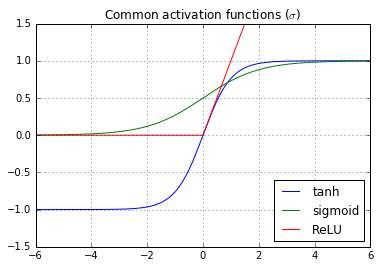

In [3]:
x = np.linspace(-6.0, 6.0, num=1000)
y_tanh = np.tanh(x)
plt.plot(x, y_tanh, label="tanh")

y_sig = 1 / (1 + np.exp(-x))
plt.plot(x, y_sig, label="sigmoid")

y_relu = np.copy(x)
y_relu[y_relu <= 0.0] = 0.0
plt.plot(x, y_relu, label="ReLU")

plt.legend(loc='lower right')
plt.ylim((-1.5, 1.5))
plt.grid()
plt.title("Common activation functions ($\sigma$)")

$$
x^l := \sigma^l \left( W^l x^{l-1} \right)
$$

$x^0$ is the input.

For the first hidden layer we would have: $x^1 := \sigma^1 \left( W^1 x^0 \right)$.

The next one would be: $x^2 := \sigma^2 \left( W^2 \sigma^1 \left( W^1 x^0 \right) \right)$

Eventually we can compute:

 * Regression, by setting a final $y = \sigma^L \left( W^L \sigma^{L-1} \left( \dots \right) \right)  \in \mathbb{R}$.
 * Classification using softmax: $y_k = \frac{\exp{\langle w_k^L, x^{L-1} \rangle}}{\sum_{m=1}^{K}\exp{\langle w_m^L, x^{L-1} \rangle}}$ (the weights in the $Lth$, i.e. final, layer are called the softmax weights)

For classification one usually uses cross-entropy loss:

$$
l(y; \hat{y}) = H(y; \hat{y}) = -y \log\hat{y} - (1 - y) \log ( 1 - \hat{y} )
$$

This boils down to:
 * $ y = 0 \iff l(y; \hat{y}) = - \log ( 1 - \hat{y} ) $ (want $\hat{y}$ to be as close to $0$ as possible)
 * $ y = 1 \iff l(y; \hat{y}) = - \log ( \hat{y} ) $ (want $\hat{y}$ to be as close to $1$ as possible)



## Regularization

Either l2 or drop-out.


## Learning

Non-convex objective, little theoretical guarantees.
Regular gradient descent almost always prohibitive. Use SGD instead.
 
TODO(andrei): Add momentum notes from Stanford lecture. Consider creating simple table comparing SGD, AdaGrad, momentum SGD, Adam, etc.

## Backpropagation

Want: $\nabla_\mathcal{L}$ w.r.t. weights (i.e. parameters $\theta$).

TODO(andrei): Write down your Stanford notes on backprop in LaTeX and possibly even implement simple toy NN here.